# **Import Libraries**

In [ ]:
pip install pycoingecko


In [3]:
 from pycoingecko import CoinGeckoAPI

# **Intialize Client**

In [4]:
client = CoinGeckoAPI()

# **Check API**

In [5]:
client.ping()

{'gecko_says': '(V3) To the Moon!'}

# **Helper Function**

In [6]:
import datetime
import time

def unix_time(year,month,day,hour,second):
    date_time = datetime.datetime(year,month,day,hour,second)
    return time.mktime(date_time.timetuple())
def human_time(unix_time):
    return datetime.datetime.fromtimestamp(unix_time)

# **Pick Start and End Dates**

In [7]:
start_time = unix_time(2020,1,1,0,0)
end_time=unix_time(2022,6,1,0,0)

print('start_time:', start_time)
print('end_time',end_time)


start_time: 1577836800.0
end_time 1654041600.0


# **Pull Data From CoinGecko**

In [8]:
btc_result =client.get_coin_market_chart_range_by_id(
    id='bitcoin',
    vs_currency='usd',
    from_timestamp=start_time,
    to_timestamp=end_time
)

eth_result=client.get_coin_market_chart_range_by_id(
    id='ethereum',
    vs_currency='usd',
    from_timestamp=start_time,
    to_timestamp=end_time

)


# **Inspect Data**

In [9]:
print ('keys:' , btc_result.keys())

btc_result

keys: dict_keys(['prices', 'market_caps', 'total_volumes'])


{'prices': [[1577836800000, 7195.153895430029],
  [1577923200000, 7193.7546679601],
  [1578009600000, 6963.853353983485],
  [1578096000000, 7300.34693530511],
  [1578182400000, 7351.377053166627],
  [1578268800000, 7349.972248050628],
  [1578355200000, 7734.675515785289],
  [1578441600000, 8147.415237636371],
  [1578528000000, 8045.789124592971],
  [1578614400000, 7832.795643840387],
  [1578700800000, 8180.513169803805],
  [1578787200000, 8012.085781814529],
  [1578873600000, 8171.401185320944],
  [1578960000000, 8110.647964503772],
  [1579046400000, 8801.871213137745],
  [1579132800000, 8820.85010599613],
  [1579219200000, 8720.91950137424],
  [1579305600000, 8902.568995225329],
  [1579392000000, 8906.902675151074],
  [1579478400000, 8690.380569544623],
  [1579564800000, 8631.253954333763],
  [1579651200000, 8724.818622931474],
  [1579737600000, 8665.436914096897],
  [1579824000000, 8415.956027335538],
  [1579910400000, 8432.096675789418],
  [1579996800000, 8348.665665079325],
  [1580

In [12]:
print('---------------------')
print('BTC Length', len(btc_result['prices']))
print('ETH Length', len(eth_result['prices']))

print('---------------------')
print('first',btc_result['prices'][0][0],human_time(btc_result['prices'][0][0]/1000))
print('last',btc_result['prices'][0][0],human_time(btc_result['prices'][-1][0]/1000))

---------------------
BTC Length 883
ETH Length 883
---------------------
first 1577836800000 2020-01-01 00:00:00
last 1577836800000 2022-06-01 00:00:00


# **Required Data Example**

In [13]:
{
    'time': [1,2,3],
    'price': [1000,999,1001]

}

{'time': [1, 2, 3], 'price': [1000, 999, 1001]}

# **Build data**

In [14]:
btc={}
btc['time']=[x[0] for x in btc_result['prices']]
btc['price']=[x[1] for x in btc_result['prices']]

eth={}
eth['time']=[x[0] for x in eth_result['prices']]
eth['price']=[x[1] for x in eth_result['prices']]


# **Plot Data**

<Axes: xlabel='time', ylabel='price'>

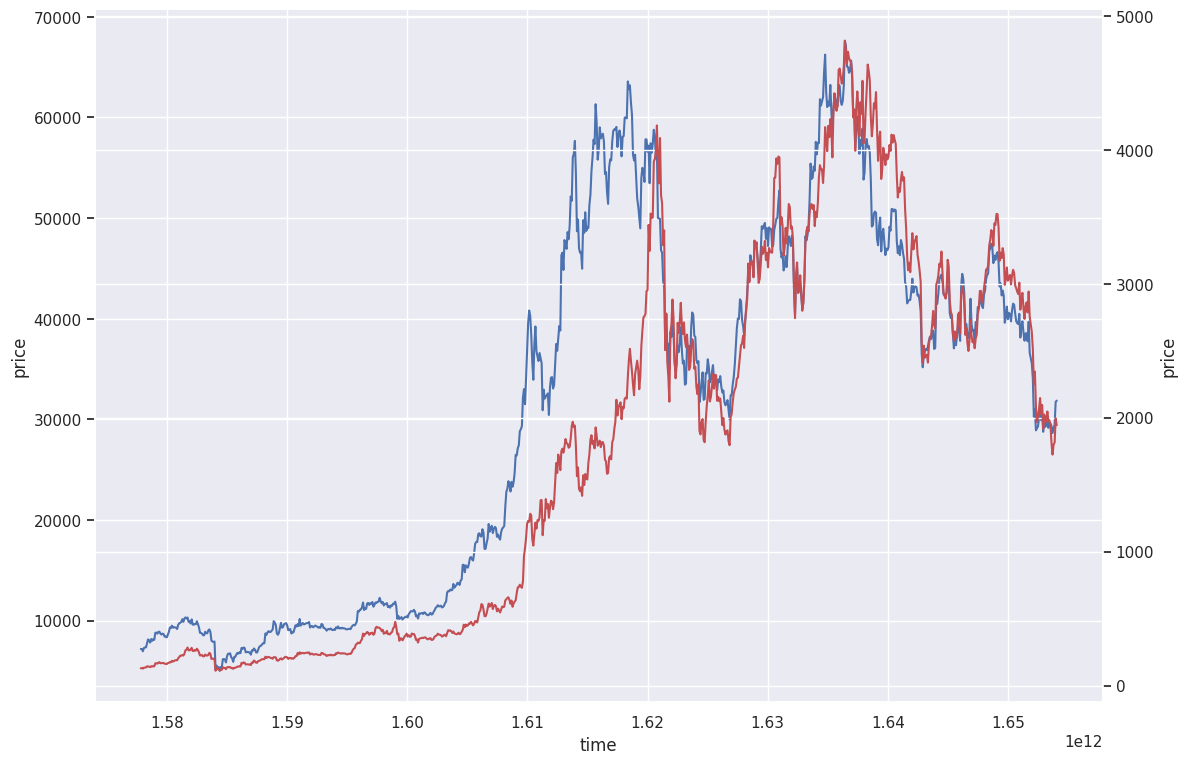

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(13,9)})
sns.set_theme(style="darkgrid")

sns.lineplot(
    x="time",
    y="price",
    data=btc
)
ax2 = plt.twinx()
sns.lineplot(
    x="time",
    y="price",
    data=eth,
    ax=ax2,
    color="r"
)